# Predição de desempenho escolar com Machine Learning

## Objectivo

Este projeto tem como objectivo utilizar algoritmos de Machine Learning para prever o **desempenho final dos alunos** do ensino secundário, com base em fatores como hábitos de estudo, apoio familiar, educação dos pais e outras variáveis pessoais.

## Escolha do Dataset

Utilizaremos o dataset "Student Performance", disponível publicamente na plataforma [OpenML](https://www.openml.org/d/40984), que contém informações detalhadas sobre alunos de duas escolas portuguesas.

## Motivação

A educação é um dos pilares fundamentais da sociedade. Compreender os fatores que contribuem para o sucesso (ou insucesso) escolar pode ajudar pais, professores e decisores a desenvolver estratégias mais eficazes de apoio ao aluno, podendo assim oferecer apoio adequado a quem mais precisa.

## Tipo de Modelo: Regressão Supervisionada

Neste projeto estamos a resolver um problema de **regressão**, pois a variável alvo (`G3`) representa a nota final do aluno, que é um valor **numérico e contínuo** entre 0 e 20.

Assim, utilizaremos algoritmos de **regressão supervisionada**, como:
- Regressão Linear
- Random Forest Regressor
- Gradient Boosting Regressor

Nosso objetivo será prever a nota final com a maior precisão possível, utilizando as restantes variáveis como preditores.

In [2]:
# Manipulação e análise de dados
import pandas as pd
import numpy as np

# Visualização / Criar gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Ignorar warnings visuais por enquanto
import warnings
warnings.filterwarnings("ignore")

# Configuração de visualização
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

In [3]:
from sklearn.datasets import fetch_openml

# Carregar o dataset com fetch_openml
data = fetch_openml(data_id=46589, as_frame=True)

# Converter em DataFrame
df = data.frame

# Visualizar as 5 primeiras linhas
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,13


### Sobre o carregamento dos dados

Usamos a função `fetch_openml` da biblioteca `scikit-learn` para importar o dataset diretamente da plataforma OpenML, onde está identificado com o ID 46589. Este dataset contém informações sobre 649 alunos, totalizam 31 variáveis diferentes incluindo:

- Características pessoais (sexo, idade)
- Fatores familiares (informações sobre os pais, apoio)
- Hábitos de estudo
- Notas de avaliação Final (`G3`)

Nosso alvo será a variável **G3** (nota final), que vamos tentar prever.

In [4]:
# Verificar as dimensões do dataset
print(f"Dimensão do dataset: {df.shape}")

# Ver os nomes das colunas
print(f"\nColunas: {df.columns.tolist()}")

# Ver os primeiros registos
df.head()

Dimensão do dataset: (649, 31)

Colunas: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,13


### Verificação de Tipos e Dados em Falta

Após inspecionar o DataFrame com o método `info()`, verificamos que:

- Todas as 31 colunas têm 649 valores não nulos → **não há valores em falta** no dataset.
- As variáveis numéricas: `age`, `Medu`, `Fedu`, `traveltime`, `studytime`, `failures`, `famrel`,`freetime`,`goout`,`Dalc`,`Walc`,`health`,`absences`,`G3` estão no tipo `int64`.
- As variáveis categóricas: `school`, `sex`, `address`, `famsize`, `Pstatus`, `Mjob`, `Fjob`, `reason` ,`guardian` ,`schoolsup`, `famsup`, `paid` ,`activities` ,`nursery` ,`higher` ,`internet` ,`romantic` ,`school` estão como `object`.

Todas as colunas estão no tipo esperado para esta fase de análise.

In [5]:
# Ver tipos de dados e número de valores não nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
# Ver se há valores em falta
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G3            0
dtype: int64

### Estatísticas Descritivas

Usamos o método `df.describe()` para observar estatísticas básicas das variáveis numéricas:

- Identificamos a média, mediana (50%), mínimo e máximo.
- As notas `G3` variam de 0 a 20, como esperado.
- Variáveis como `absences` ou `Dalc` (consumo de álcool diário) podem ter valores extremos — analisaremos visualmente mais à frente.
- O desvio padrão (`std`) ajuda-nos a ver a dispersão dos dados e planear uma possível normalização mais tarde.

Esta análise permite-nos compreender melhor a natureza dos dados e levantar hipóteses para futuras transformações ou remoções de outliers.

In [7]:
# Descrição geral das variáveis numéricas
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000


In [8]:
# Mostrar estatísticas de todas as variáveis, incluindo object
df.describe(include='all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
count,649,649,649.000000,649,649,649,649.000000,649.000000,649,649,...,649,649,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,423,383,NaN,452,457,569,NaN,NaN,258,367,...,498,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.744222,NaN,NaN,NaN,2.514638,2.306626,NaN,NaN,...,NaN,NaN,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.906009
std,NaN,NaN,1.218138,NaN,NaN,NaN,1.134552,1.099931,NaN,NaN,...,NaN,NaN,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,3.230656
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,...,NaN,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,NaN,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000


### Análise de Variabilidade por Coluna

Utilizámos `df.nunique()` para verificar o número de valores únicos por coluna. Com isso, identificámos:

- 13 colunas com apenas 2 valores → são variáveis binárias e devem ser convertidas para 0 e 1. (ter em atenção que quase todas estas variáveis binárias são categóricas também, portanto seria preferível fazer one-hot encoding para regressão linear)
- Colunas categóricas como `guardian`, `reason`, `Fjob`, `Mjob`, devem ser codificadas com one-hot encoding.
- Variáveis contínuas ou discretas como `age`, `absences`, `G3` → mantidas como numéricas.
- Variáveis ordinais como `studytime`, `traveltime`, `failures`, `health`, `Walc`, `Dalc`, `goout`, `freetime`, `famrel`, `Medu`, `Fedu`, podem ser mantidas como inteiros, pois os seus níveis indicam ordem ou são hierárquicos.

Este passo ajuda a decidir como preparar cada variável para o modelo.

In [9]:
# Ver número de valores únicos por coluna
df.nunique().sort_values()


school         2
romantic       2
internet       2
higher         2
nursery        2
activities     2
paid           2
famsup         2
schoolsup      2
famsize        2
Pstatus        2
address        2
sex            2
guardian       3
reason         4
traveltime     4
studytime      4
failures       4
health         5
Walc           5
Dalc           5
goout          5
freetime       5
Fjob           5
Mjob           5
Medu           5
Fedu           5
famrel         5
age            8
G3            17
absences      24
dtype: int64

### Análise da Distribuição da Nota Final (G3)

A variável alvo `G3` apresenta uma distribuição com maior concentração de alunos entre as notas 10 e 14, indicando um desempenho geral equilibrado e variabilidade suficiente para aplicação de modelos de regressão.

Apesar dessa concentração, observa-se um número significativo de alunos com nota igual a zero (15 alunos). Esse valor pode representar reprovações diretas ou ausência no exame final, configurando um caso especial que afeta a distribuição, criando uma assimetria à esquerda.

A presença desses valores extremos deve ser considerada nas etapas seguintes, pois pode impactar a performance e o ajuste do modelo. Dependendo do objetivo, pode justificar abordagens específicas, como tratamento diferenciado para esses casos ou modelagem segmentada.

No geral, a distribuição de `G3` é razoavelmente simétrica, o que é favorável para técnicas de regressão, pois indica que há variabilidade e estrutura nos dados a serem exploradas pelos algoritmos de machine learning.

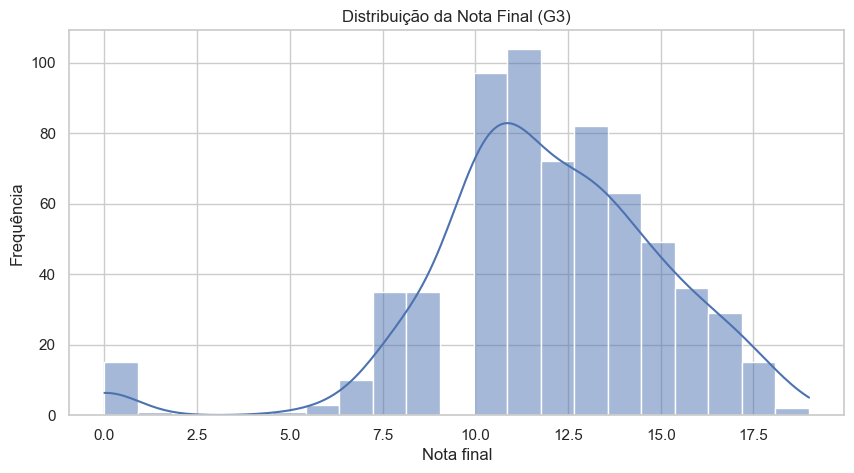

Número de alunos com G3 = 0: 15


In [10]:
# Distribuição das notas finais
sns.histplot(df['G3'], bins=21, kde=True)
plt.title("Distribuição da Nota Final (G3)")
plt.xlabel("Nota final")
plt.ylabel("Frequência")
plt.show()

# Contagem de alunos com nota zero
zero_count = (df['G3'] == 0).sum()
print(f"Número de alunos com G3 = 0: {zero_count}")


### Boxplots — Observações e Decisões

#### age
- **Observação:** concentração em 16–18; 1–2 valores perto de 22.
- **Decisão:** valores plausíveis → manter tal como está; sem tratamento especial.

#### Medu
- **Observação:** concentrado em 2–4; 0 existe e é válido ("nenhuma").
- **Decisão:** manter como **ordinal (0–4)**; sem tratamento.

#### Fedu 
- **Observação:** distribuição equilibrada entre 1–4; 0 existe e é válido (“nenhuma”).
- **Implicação:** tratar como **ordinal (0–4)**. Em engenharia de atributos, testar combinação com `Medu`:
  - `parents_edu_mean`, `parents_edu_max` ou indicador `both_high = (Medu>=3 & Fedu>=3)`.
 
#### traveltime
- **Observação:** maioria em 1–2; poucos em 4 (outliers leves).
- **Decisão:** manter; opcional testar binarização “curto (1–2) vs longo (3–4)”.

#### studytime
- **Observação:** maioria em 1–2; poucos em 4 (outliers leves).
- **Decisão:** manter; opcional testar binarização “baixo (1–2) vs alto (3–4)” numa iteração

#### failures
- **Observação:** distribuição extremamente enviesada para 0; poucos casos em 1–3 (aparecem como outliers).
- **Implicação:** manter no baseline. Experimentos úteis:
  - **Binarizar**: `has_fail = (failures > 0)` (captura o efeito “já reprovou alguma vez”).
  - Tratar como ordinal para árvores; para modelos lineares, comparar ordinal vs. binarizado.

#### famrel
- **Observação:** enviesado para 4–5; raros valores 1–2 (marcados como outliers).
- **Decisão:** variável **ordinal (1–5)**; manter. Testar impacto de tratá-la como ordinal vs. one-hot (apenas para modelos lineares).

#### freetime
- **Observação:** centrado em 3–4; poucos valores em 1.
- **Decisão:** manter como **ordinal**; sem tratamento.

#### goout
- **Observação:** distribuição aproximadamente simétrica (2–4).
- **Decisão:** manter como **ordinal**; sem tratamento.

### Dalc (Consumo de álcool diário)
- **Observação:** maioria em 1–2; poucos pontos em 4–5 (outliers).
- **Implicação:** manter como ordinal. Em iteração futura, comparar:
  - sem tratamento vs. `capping` no P95; 
  - feature agregada com `Walc` (p.ex. `alc_mean = (Dalc+Walc)/2` ou `alc_max = max(Dalc,Walc)`).

### Walc (Consumo de álcool ao fim-de-semana)
- **Observação:** distribuição concentrada em 1–3; alguns valores em 5. Sem outliers marcados.
- **Implicação:** variável **ordinal (1–5)**. Manter no baseline. Depois testar agregações com `Dalc` (média ou máximo).

#### health
- **Observação:** enviesado para valores altos (4–5).
- **Decisão:** manter como **ordinal**; sem tratamento..

#### absences
- **Observação:** distribuição assimétrica à direita; maioria ≤ 6–8 faltas; vários pontos > 15 (cauda longa).
- **Decisão:** manter no baseline; nas iterações testar **log1p** ou **capping** (p.ex., P95) e comparar.

#### G3
- **Observação:** massa entre 10–14; alguns zeros (caso especial).
- **Decisão:** baseline **com todos** os casos; criar experimento alternativo **sem G3=0** e comparar métricas.

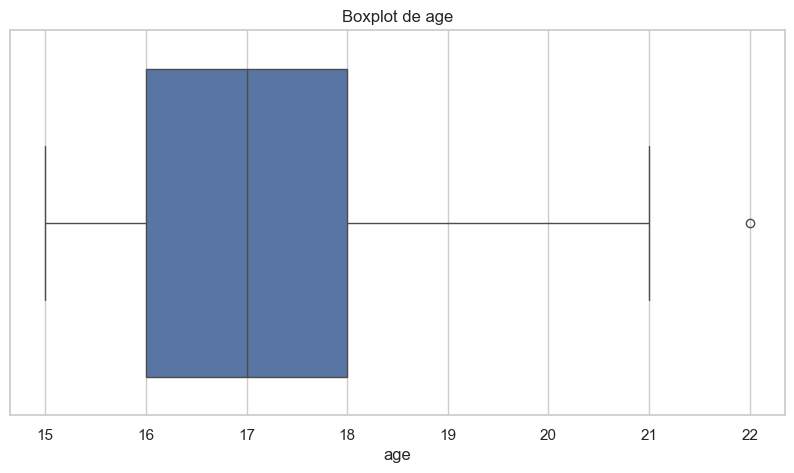

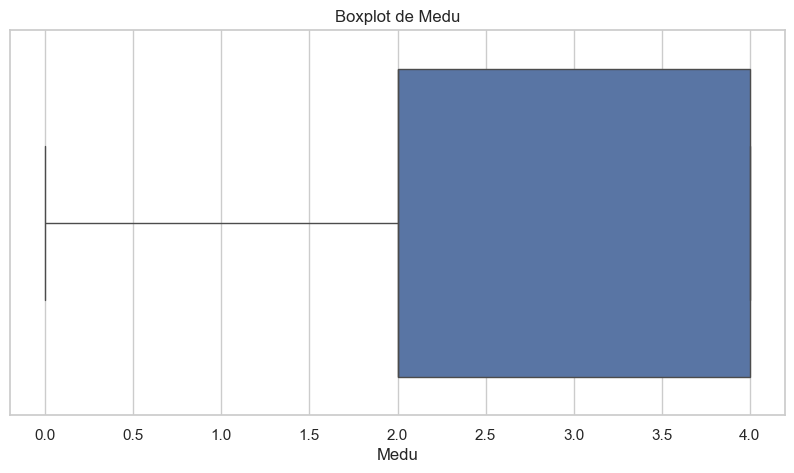

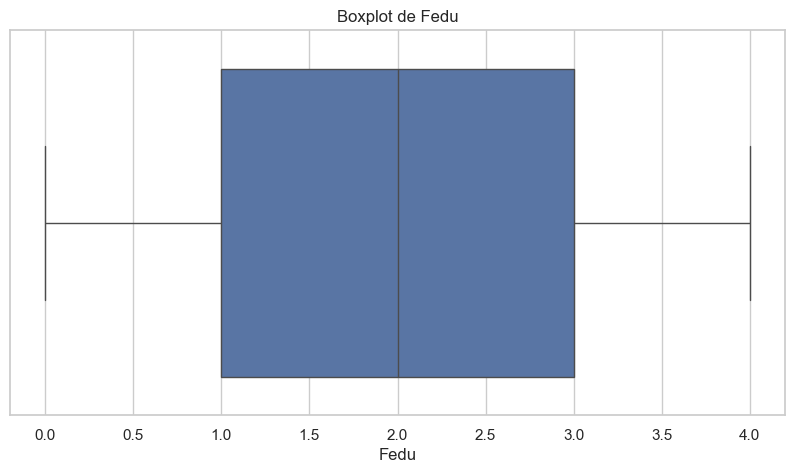

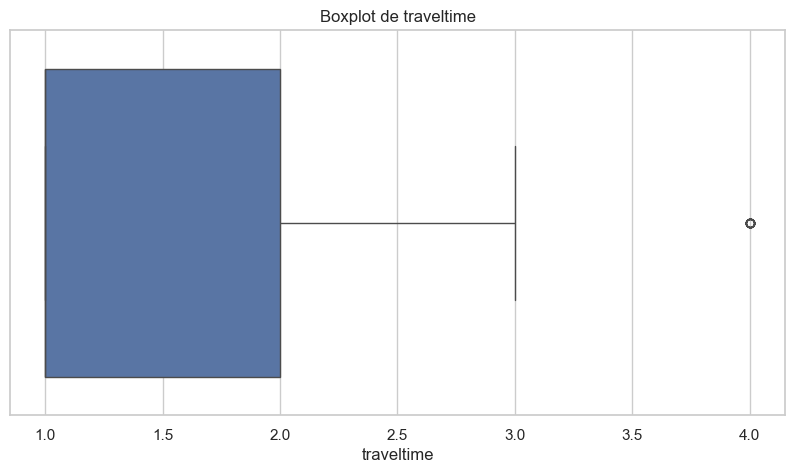

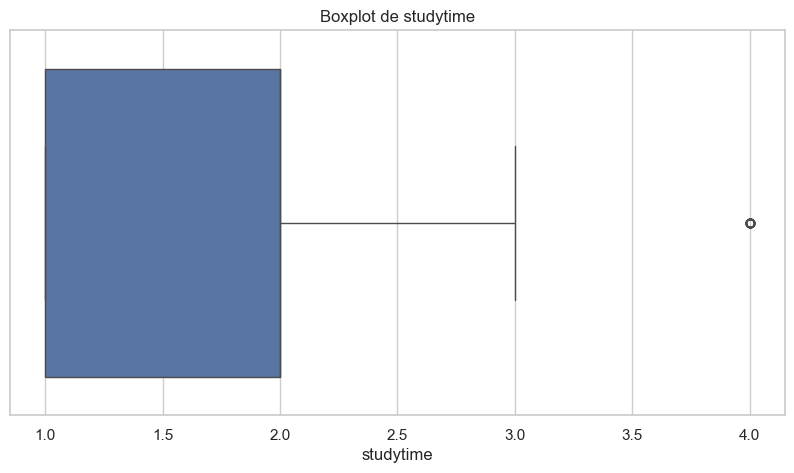

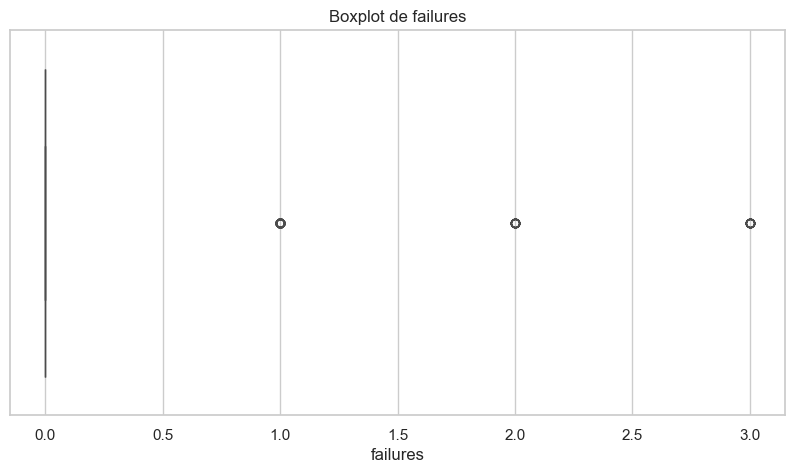

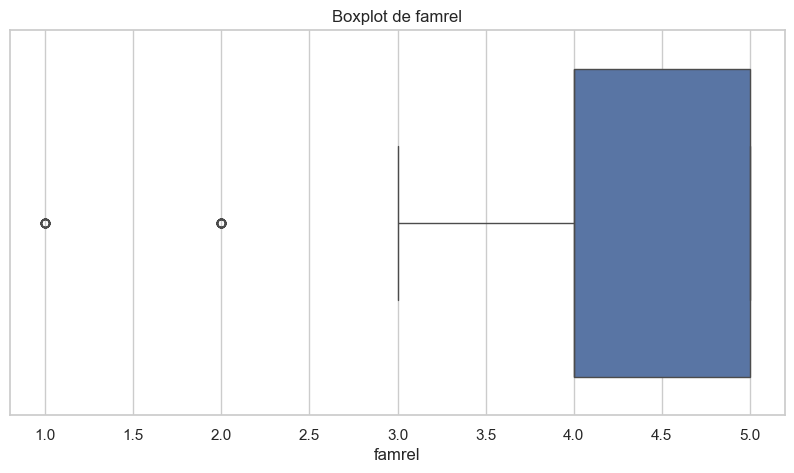

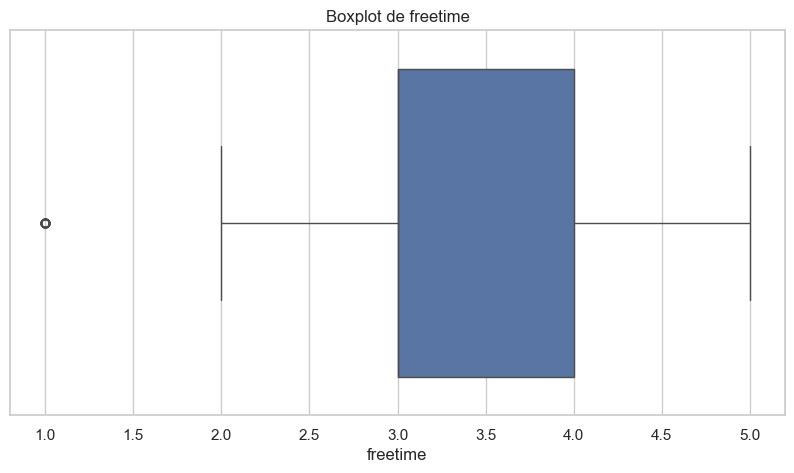

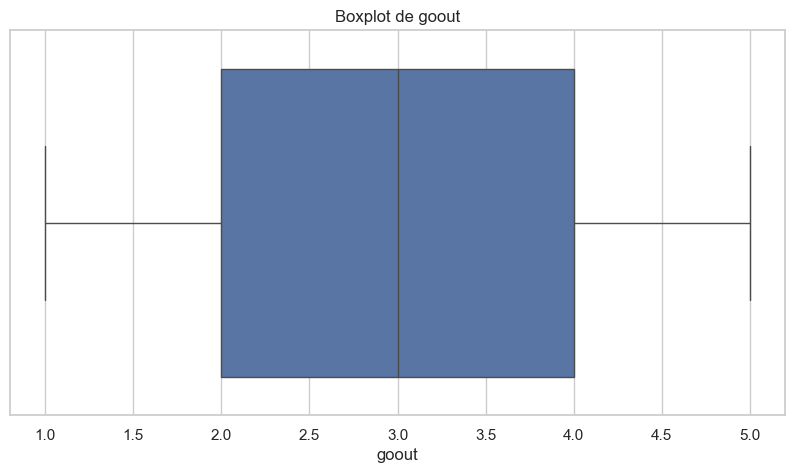

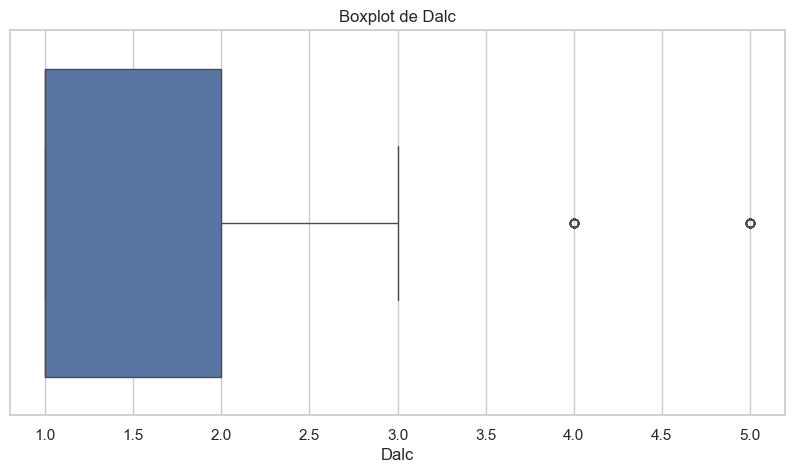

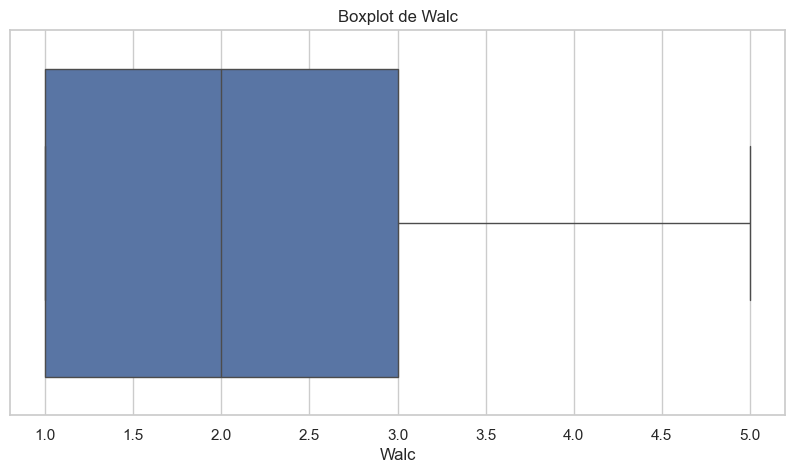

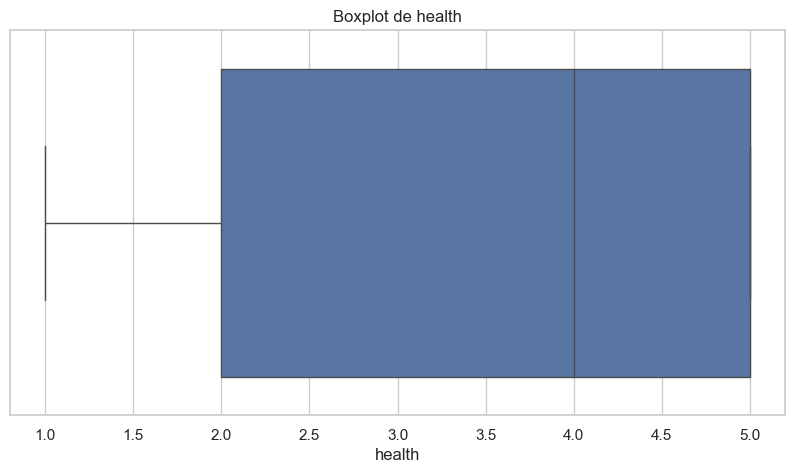

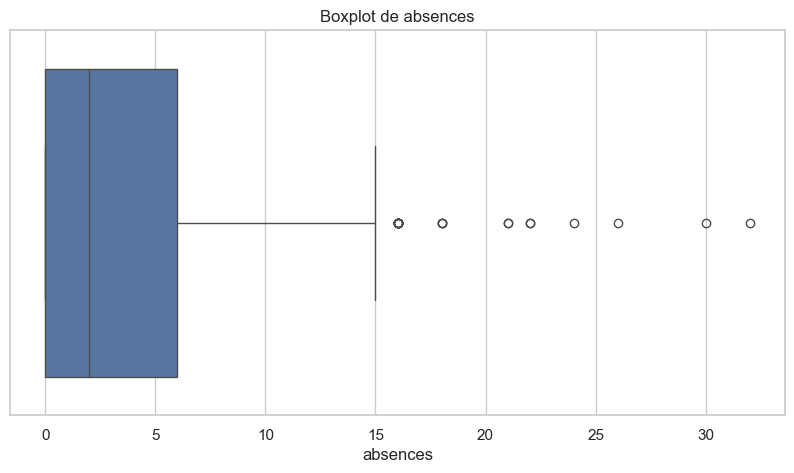

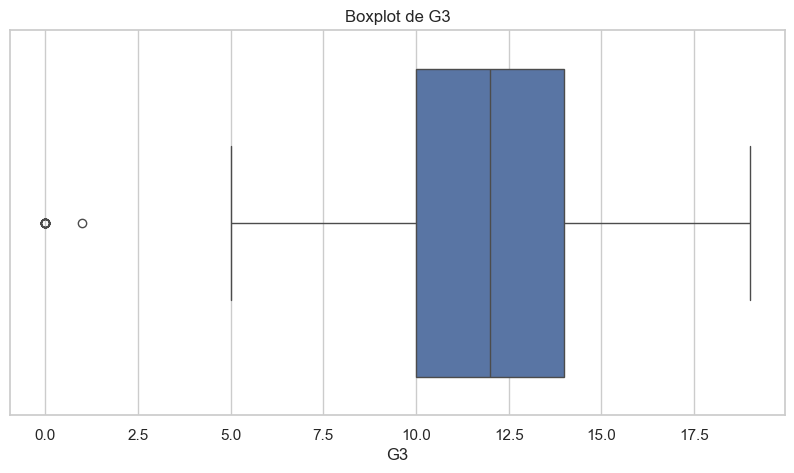

In [11]:
# Detetar possíveis outliers nas variáveis numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

### Análise da Matriz de Correlação entre Variáveis Numéricas

Foi gerada uma matriz de correlação utilizando o coeficiente de Pearson, com o objetivo de identificar relações lineares entre as variáveis numéricas do dataset.

A análise concentrou-se em identificar variáveis com correlação significativa com a variável alvo `G3` (nota final), bem como relações fortes entre variáveis que possam indicar redundância.

#### Correlações mais relevantes com `G3`:

- **`failures`**: correlação **negativa moderada** com `G3` (**-0.39**). Vale testar uma versão **binarizada** (`has_fail = failures>0`), além da ordinal.
- **`studytime`**: correlação positiva leve (**0.25**)
- **`Medu` (educação da mãe)** e **`Fedu` (educação do pai)**: correlações positivas leves (**0.24** e **0.21**, respetivamente).
- **`Dalc` (álcool diário)** e **`Walc` (álcool ao fim de semana)**: correlações negativas leves com `G3` (**-0.20** e **-0.18**)

Variáveis como `age`, `freetime`, `traveltime` e `health` mostraram correlações fracas (entre **-0.1** e **-0.13**). Mantemos no baseline; se contribuírem pouco, podemos remover mais tarde.

#### Outras correlações fortes entre variáveis:

- **`Medu` e `Fedu`**: correlação **muito forte positiva** (**0.65**) Em modelos lineares, a **multicolinearidade** entre `Medu` e `Fedu` pode inflacionar coeficientes; usar **Ridge/Lasso** ou combinar numa única feature pode ajudar.
- **`Dalc` e `Walc`**: correlação **muito forte positiva** (**0.62**) Testar agregações: `alc_mean` ou `alc_max`
- **`Walc` e `goout`**: correlação moderada (**0.39**)
- **`goout` e `freetime`**: correlação moderada (**0.35**)
- **`age` e `failures`**: correlação moderada (**0.32**)
- **`Dalc` e `goout`**: correlação leve (**0.25**) 

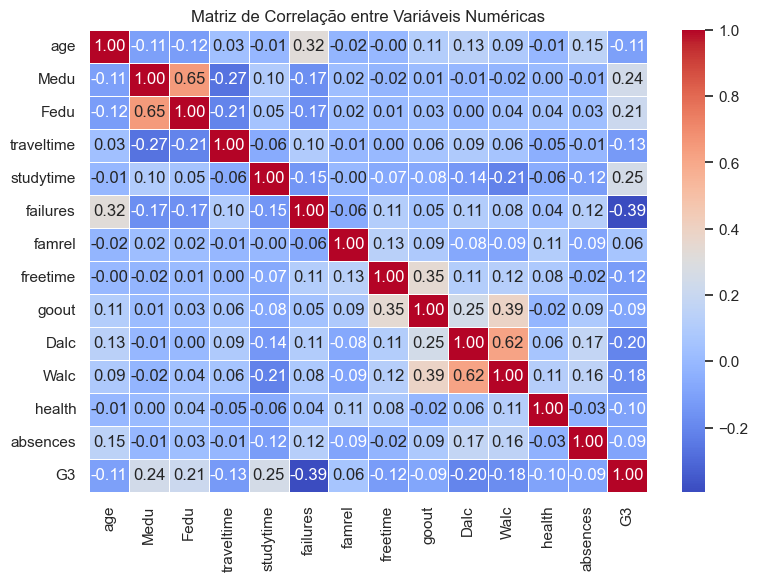

In [12]:
# Calcular a matriz de correlação apenas para variáveis numéricas
corr = df.corr(numeric_only=True)

# Criar o heatmap
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()

In [14]:
df.duplicated().sum()           # nº de linhas 100% repetidas
df = df.drop_duplicates()


In [16]:
assert df['age'].between(15,22).all()
assert df['studytime'].isin([1,2,3,4]).all()
assert (df['absences']>=0).all()
assert df['Dalc'].isin([1,2,3,4,5]).all() and df['Walc'].isin([1,2,3,4,5]).all()


# Baseline (v0) — sem engenharia de atributos
 - Mantém todas as linhas (inclui G3 = 0)
 - Sem remoção/cap de outliers (apenas escalação robusta)
 - Categóricas nominais: One-Hot (drop para binárias)
 - Numéricas/ordinais: RobustScaler
 - Modelos: Ridge, RandomForest, GradientBoosting
 - Métricas: R2, RMSE, MAE

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Definir target e features
target = "G3"

# Variáveis nominais
nominal = [
    "school","sex","address","famsize","Pstatus","Mjob","Fjob","reason",
    "guardian","schoolsup","famsup","paid","activities","nursery",
    "higher","internet","romantic"
]

# Variáveis numéricas/ordinais
num_ord = [
    "age","Medu","Fedu","traveltime","studytime","failures","famrel",
    "freetime","goout","Dalc","Walc","health","absences"
]

X = df[nominal + num_ord].copy()
y = df[target].copy()

# Pré-processamento: One-Hot para nominais + Escala
ohe = OneHotEncoder(handle_unknown="ignore", drop="if_binary", sparse_output=False)
scaler = RobustScaler()

preprocess = ColumnTransformer(
    transformers=[
        ("cat", ohe, nominal),  # One-Hot nas nominais
        ("num", scaler, num_ord)  # Escalação robusta nas num/ord
    ],
    remainder="drop"  # Mantém apenas o que definimos acima
)

# Definir os modelos para o baseline (v0)
models = {
    # Regressão linear com regularização L2 - Ridge
    "ridge": Ridge(alpha=1.0),

    # Random Forest 
    "rf": RandomForestRegressor(
        n_estimators=300, random_state=42, n_jobs=-1
    ),

    # Gradient Boosting
    "gbr": GradientBoostingRegressor(random_state=42)
}

# Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Função utilitária para treinar, prever e avaliar métricas
def fit_eval(name, estimator, Xtr, Xte, ytr, yte):
    """
    Constrói um Pipeline(preprocess -> modelo), treina e avalia.
    Retorna um dicionário com métricas e o pipeline treinado.
    """
    pipe = Pipeline([
        ("prep", preprocess),
        ("model", estimator)
    ])

    # Treino
    pipe.fit(Xtr, ytr)

    # Predição
    y_pred = pipe.predict(Xte)

    # Métricas
    mse  = mean_squared_error(yte, y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(yte, y_pred)
    r2   = r2_score(yte, y_pred)

    return {
        "model": name,
        "R2": r2,
        "RMSE": rmse,
        "MAE": mae,
        "pipeline": pipe
    }

# Executar baseline e organizar resultados
results = [fit_eval(name, est, X_train, X_test, y_train, y_test)
           for name, est in models.items()]

# Tabela ordenada por R² (decrescente)
results_df = pd.DataFrame([{k: v for k, v in r.items() if k != "pipeline"} for r in results]) \
               .sort_values("R2", ascending=False) \
               .reset_index(drop=True)

print("== Resultados Baseline (v0) ==")
print(results_df.to_string(index=False))

# Guardar o melhor pipeline (pelo maior R²) para uso posterior
best_idx = results_df["R2"].idxmax()
best_name = results_df.loc[best_idx, "model"]
best_pipe = next(r["pipeline"] for r in results if r["model"] == best_name)

print(f"\nMelhor modelo no baseline: {best_name}")


== Resultados Baseline (v0) ==
model       R2     RMSE      MAE
  gbr 0.203267 2.787385 2.093134
   rf 0.194309 2.803011 2.040692
ridge 0.163386 2.856296 2.149755

Melhor modelo no baseline: gbr


# Experimentos Iterativos (v1..v6) sobre o Baseline
- Mantém o mesmo pré-processamento (One-Hot + RobustScaler)
- Introduz hipóteses simples:
  - V1: binarizar failures
  - V2: combinar educação dos pais
  - V3: agregar álcool (Dalc/Walc)
  - V4: transformar absences com log1p
  - V5: remover casos G3==0
  - V6: combinação das melhores (fail_bin + parents_mean + alc_mean + abs_log + remove_zeros)
- Avaliação com RepeatedKFold para reduzir variância do split

In [13]:
from sklearn.model_selection import RepeatedKFold, cross_validate, train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error

# Definir listas de colunas base
target = "G3"
nominal = [
    "school","sex","address","famsize","Pstatus","Mjob","Fjob","reason",
    "guardian","schoolsup","famsup","paid","activities","nursery",
    "higher","internet","romantic"
]
num_ord_base = [
    "age","Medu","Fedu","traveltime","studytime","failures","famrel",
    "freetime","goout","Dalc","Walc","health","absences"
]

# Função para criar uma variante de dataset (flags)
def make_variant(df, *, 
                 fail_bin=False, parents_mean=False, 
                 alc_mean=False, alc_max=False, 
                 abs_log=False, remove_zeros=False):
    """
    Cria X,y a partir de df aplicando flags de engenharia de atributos.
    Retorna (X, y).
    """
    X = df[nominal + num_ord_base].copy()
    y = df[target].copy()

    # Remover zeros do target (V5)
    if remove_zeros:
        mask = y != 0
        X, y = X.loc[mask].copy(), y.loc[mask].copy()

    # V1: failures -> has_fail (0/1) (mantemos ambas para árvores; em modelos lineares a regularização lida)
    if fail_bin:
        X["has_fail"] = (X["failures"] > 0).astype(int)

    # V2: educação dos pais combinada
    if parents_mean:
        X["parents_edu_mean"] = (X["Medu"] + X["Fedu"]) / 2.0

    # V3: álcool agregado
    if alc_mean:
        X["alc_mean"] = (X["Dalc"] + X["Walc"]) / 2.0
    if alc_max:
        X["alc_max"] = np.maximum(X["Dalc"], X["Walc"])

    # V4: transformação de outlier leve em absences
    if abs_log:
        X["absences_log1p"] = np.log1p(X["absences"])

    return X, y

# Pré-processamento
# One-Hot (cai uma coluna em binárias) + RobustScaler em numéricas/ordinais
ohe = OneHotEncoder(handle_unknown="ignore", drop="if_binary", sparse_output=False)

scaler = RobustScaler()

def build_preprocess(X):
    """
    Constrói um ColumnTransformer com base nas colunas atuais de X.
    - Categóricas nominais: as definidas em `nominal`
    - Numéricas: 'todas as restantes' (inclui features engenheiradas)
    """
    # Qualquer coluna presente em X que não é nominal será tratada como numérica
    num_cols = [c for c in X.columns if c not in nominal]
    return ColumnTransformer(
        transformers=[
            ("cat", ohe, nominal),
            ("num", scaler, num_cols)
        ],
        remainder="drop"
    )

# Modelos a comparar
models = {
    "ridge": Ridge(alpha=1.0),
    "rf": RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1),
    "gbr": GradientBoostingRegressor(random_state=42)
}

# Validação cruzada
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

# Scoring: usar neg_MSE e converter para RMSE manualmente
scoring = {
    "r2": "r2",
    "neg_mse": "neg_mean_squared_error",
    "mae": "neg_mean_absolute_error"
}

# Tabela de Experimentos (flags por variante)
experiments = [
    ("v0_baseline",      dict(fail_bin=False, parents_mean=False, alc_mean=False, alc_max=False, abs_log=False, remove_zeros=False)),
    ("v1_fail_bin",      dict(fail_bin=True,  parents_mean=False, alc_mean=False, alc_max=False, abs_log=False, remove_zeros=False)),
    ("v2_abs_log",       dict(fail_bin=False, parents_mean=False, alc_mean=False, alc_max=False, abs_log=True,  remove_zeros=False)),
    ("v3_alc_mean",      dict(fail_bin=False, parents_mean=False, alc_mean=True,  alc_max=False, abs_log=False, remove_zeros=False)),
    ("v4_parents_mean",  dict(fail_bin=False, parents_mean=True,  alc_mean=False, alc_max=False, abs_log=False, remove_zeros=False)),
    ("v5_remove_zeros",  dict(fail_bin=False, parents_mean=False, alc_mean=False, alc_max=False, abs_log=False, remove_zeros=True)),
    ("v6_combo_top",     dict(fail_bin=True,  parents_mean=True,  alc_mean=True,  alc_max=False, abs_log=True,  remove_zeros=True)),
]

# Executor: roda CV para cada (variante x modelo) e agrega métricas
all_rows = []

for exp_name, flags in experiments:
    # Criar X, y conforme a variante
    Xv, yv = make_variant(df, **flags)

    # Construir preprocessador com as colunas atuais
    preprocess = build_preprocess(Xv)

    for model_name, estimator in models.items():
        # Pipeline completo: preprocessamento + modelo
        pipe = Pipeline([("prep", preprocess), ("model", estimator)])

        # Validação cruzada
        cvres = cross_validate(
            pipe, Xv, yv, cv=cv, scoring=scoring,
            n_jobs=-1, return_train_score=False
        )

        # Agregar métricas (média e desvio-padrão)
        r2_mean  = cvres["test_r2"].mean()
        r2_std   = cvres["test_r2"].std()
        mse_mean = -cvres["test_neg_mse"].mean()
        rmse_mean = np.sqrt(mse_mean)
        mae_mean = -cvres["test_mae"].mean()

        all_rows.append({
            "exp": exp_name,
            "model": model_name,
            "R2_mean": r2_mean,
            "R2_std": r2_std,
            "RMSE_mean": rmse_mean,
            "MAE_mean": mae_mean,
            **flags
        })

# Resultados ordenados por R²
results_iter = pd.DataFrame(all_rows).sort_values(["R2_mean"], ascending=False).reset_index(drop=True)
print("== Resultados por CV (média em 5x5 folds) ==")
print(results_iter[["exp","model","R2_mean","R2_std","RMSE_mean","MAE_mean"]].to_string(index=False))


== Resultados por CV (média em 5x5 folds) ==
            exp model  R2_mean   R2_std  RMSE_mean  MAE_mean
v5_remove_zeros    rf 0.334699 0.052286   2.186434  1.731206
   v6_combo_top    rf 0.330949 0.052822   2.192910  1.733771
   v6_combo_top   gbr 0.317969 0.047799   2.216642  1.755984
v5_remove_zeros   gbr 0.316271 0.053235   2.217500  1.756257
   v6_combo_top ridge 0.309733 0.067015   2.227395  1.760331
v5_remove_zeros ridge 0.295684 0.070363   2.250456  1.778145
    v3_alc_mean    rf 0.290957 0.075779   2.706517  1.984490
    v1_fail_bin    rf 0.290083 0.073837   2.708471  1.986081
     v2_abs_log    rf 0.289993 0.074228   2.708115  1.986457
    v0_baseline    rf 0.289540 0.072959   2.709314  1.987158
v4_parents_mean    rf 0.288877 0.075143   2.710287  1.983129
    v1_fail_bin ridge 0.268081 0.077303   2.742511  2.001741
    v0_baseline   gbr 0.250319 0.079377   2.779876  2.060834
     v2_abs_log   gbr 0.249799 0.079369   2.780697  2.061862
    v1_fail_bin   gbr 0.248376 0.080270 

## Conclusão sobre os resultados
 - Maior ganho vem de V5_remove_zeros com Random Forest
 - V6_combo_top fica logo em segundo lugar por muito pouco, mas podemos concluir que a remoção dos zeros é o driver principal
 - Gradient Boosting e Ridge também melhoraram, mas Random Forest é o que lidera.

## Tuning (v5_remove_zeros): RandomForest e GradientBoosting
- Usa RepeatedKFold para estabilidade
- RandomizedSearchCV para explorar hiperparâmetros
- Avalia no final num holdout (20%)

In [14]:
from sklearn.model_selection import train_test_split, RepeatedKFold, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Preparar variante v5 (remove zeros do target)
target = "G3"
nominal = [
    "school","sex","address","famsize","Pstatus","Mjob","Fjob","reason",
    "guardian","schoolsup","famsup","paid","activities","nursery",
    "higher","internet","romantic"
]
num_ord = [
    "age","Medu","Fedu","traveltime","studytime","failures","famrel",
    "freetime","goout","Dalc","Walc","health","absences"
]

df_v5 = df[df[target] != 0].copy()   # remove casos G3=0
X = df_v5[nominal + num_ord].copy()
y = df_v5[target].copy()

#  Pré-processamento
# - One-Hot nas nominais (drop em binárias)
# - RobustScaler nas numéricas/ordinais
ohe = OneHotEncoder(handle_unknown="ignore", drop="if_binary", sparse_output=False)

preprocess = ColumnTransformer(
    transformers=[
        ("cat", ohe, nominal),
        ("num", RobustScaler(), num_ord),
    ],
    remainder="drop"
)

# Split holdout (para avaliar ao fim do tuning)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=42)

# Definir modelos e espaços de pesquisa
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_distributions = {
    "model__n_estimators":  [300, 500, 800, 1200],
    "model__max_depth":     [None, 6, 8, 12, 16, 24, 32],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf":  [1, 2, 4],
    "model__max_features":  [1.0, "sqrt", "log2"],
    "model__bootstrap":     [True, False],
}

gbr = GradientBoostingRegressor(random_state=42)
gbr_distributions = {
    "model__n_estimators":  [200, 400, 600, 800],
    "model__learning_rate": [0.01, 0.03, 0.05, 0.1, 0.2],
    "model__max_depth":     [2, 3, 4, 5, 6],
    "model__subsample":     [0.6, 0.75, 0.9, 1.0],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf":  [1, 2, 4],
    "model__max_features":  [1.0, "sqrt", "log2"],
}

# CV e Search
# - RepeatedKFold reduz variância
# - scoring='r2' 
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

rf_pipe = Pipeline([("prep", preprocess), ("model", rf)])
gbr_pipe = Pipeline([("prep", preprocess), ("model", gbr)])

rf_search = RandomizedSearchCV(
    rf_pipe, rf_distributions, n_iter=30, scoring="r2",
    cv=cv, random_state=42, n_jobs=-1, verbose=1
)
gbr_search = RandomizedSearchCV(
    gbr_pipe, gbr_distributions, n_iter=30, scoring="r2",
    cv=cv, random_state=42, n_jobs=-1, verbose=1
)

# Executar buscas
rf_search.fit(X_tr, y_tr)
gbr_search.fit(X_tr, y_tr)

print("RF best R2 (CV):", rf_search.best_score_)
print("RF best params :", rf_search.best_params_)
print("GB best R2 (CV):", gbr_search.best_score_)
print("GB best params :", gbr_search.best_params_)

# Avaliar no holdout
def evaluate(name, best_est, Xte, yte):
    ypred = best_est.predict(Xte)
    mse = mean_squared_error(yte, ypred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(yte, ypred)
    r2  = r2_score(yte, ypred)
    print(f"\n[{name}] Holdout -> R2={r2:.3f}  RMSE={rmse:.3f}  MAE={mae:.3f}")
    return r2, rmse, mae

r2_rf, rmse_rf, mae_rf = evaluate("RF tuned", rf_search.best_estimator_, X_te, y_te)
r2_gb, rmse_gb, mae_gb = evaluate("GB tuned", gbr_search.best_estimator_, X_te, y_te)

# Escolher o melhor final
best_final = rf_search.best_estimator_ if r2_rf >= r2_gb else gbr_search.best_estimator_
best_name  = "RF tuned" if r2_rf >= r2_gb else "GB tuned"
print(f"\nMelhor (holdout): {best_name}")


Fitting 15 folds for each of 30 candidates, totalling 450 fits
Fitting 15 folds for each of 30 candidates, totalling 450 fits
RF best R2 (CV): 0.3199686302208773
RF best params : {'model__n_estimators': 500, 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_features': 1.0, 'model__max_depth': 16, 'model__bootstrap': True}
GB best R2 (CV): 0.32834326699367444
GB best params : {'model__subsample': 0.6, 'model__n_estimators': 800, 'model__min_samples_split': 10, 'model__min_samples_leaf': 4, 'model__max_features': 'log2', 'model__max_depth': 3, 'model__learning_rate': 0.01}

[RF tuned] Holdout -> R2=0.321  RMSE=2.359  MAE=1.858

[GB tuned] Holdout -> R2=0.322  RMSE=2.357  MAE=1.896

Melhor (holdout): GB tuned


## Conclusão sobre os resultados
    - GB tuned ficou ligeiramente melhor no CV e no holdout, portanto vamos tentar seguir com GB

## Importância de Features (permutações no holdout)

Calculamos importâncias por permutação no **holdout** para o pipeline final (prep + GB tuned).  
Isso reflete a contribuição **real** de cada feature **no modelo entregue**.


In [19]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(
    best_final, X_te, y_te,
    n_repeats=40, random_state=42, scoring="r2", n_jobs=-1
)

imp = pd.Series(perm.importances_mean, index=X_te.columns) \
        .sort_values(ascending=False)

print("Top 15 importâncias (permutações):")
display(imp.head(15))


Top 15 importâncias (permutações):


failures     0.139140
higher       0.059709
age          0.031635
schoolsup    0.021624
Medu         0.018238
school       0.017673
health       0.016516
Fedu         0.012881
studytime    0.011339
Fjob         0.010479
reason       0.010125
sex          0.008055
guardian     0.007365
famrel       0.006932
freetime     0.005687
dtype: float64

## Diagnóstico de Erros

Verificamos resíduos vs. predito, distribuição dos resíduos e os 10 piores casos.


### Interpretação dos resultados

 - Histograma dos resíduos: aproximadamente centrado em 0, mas com cauda moderada dos dois lados. Não há grandes desvios.

 - Resíduos vs. Predito: vê-se um padrão em rampa.

 - Piores 10 casos: Não parece haver heteroscedasticidade grave, é mais viés de amplitude.

### Conclusão

Resíduos aproximadamente centrados em 0, com caudas moderadas. Observa-se padrão de compressão: o modelo tende a subestimar notas altas e a sobrestimar notas baixas (regressão à média).

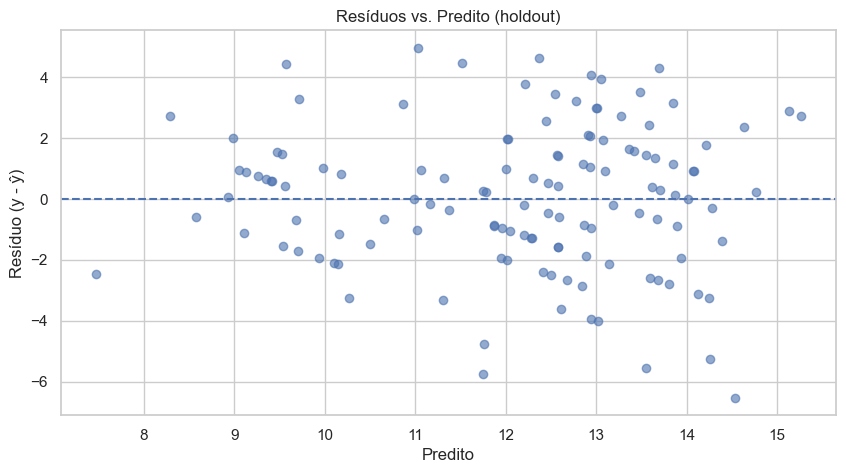

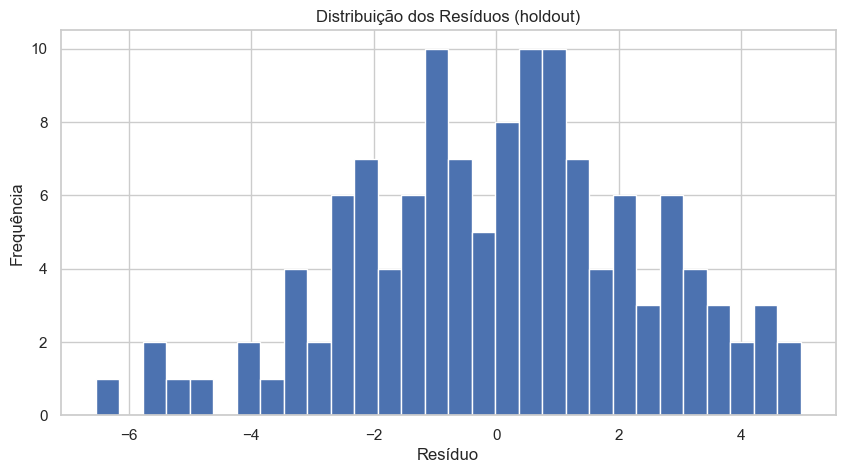

,y_true,y_pred,abs_err
0,8,14.533644,6.533644
1,6,11.751260,5.751260
2,8,13.544521,5.544521
3,9,14.255320,5.255320
4,16,11.032433,4.967567
5,7,11.764108,4.764108
6,17,12.366380,4.633620
7,16,11.520121,4.479879
8,14,9.568780,4.431220
9,18,13.697938,4.302062


In [18]:
y_pred = best_final.predict(X_te)
resid  = y_te - y_pred

# Resíduos vs Predito
plt.figure()
plt.scatter(y_pred, resid, alpha=0.6)
plt.axhline(0, ls="--")
plt.xlabel("Predito")
plt.ylabel("Resíduo (y - ŷ)")
plt.title("Resíduos vs. Predito (holdout)")
plt.show()

# Histograma dos resíduos
plt.figure()
plt.hist(resid, bins=30)
plt.title("Distribuição dos Resíduos (holdout)")
plt.xlabel("Resíduo")
plt.ylabel("Frequência")
plt.show()

# Top-10 piores erros absolutos (útil para análise qualitativa)
abs_err = np.abs(resid)
worst_idx = np.argsort(-abs_err)[:10]
pd.DataFrame({
    "y_true": np.array(y_te)[worst_idx],
    "y_pred": np.array(y_pred)[worst_idx],
    "abs_err": np.array(abs_err)[worst_idx]
})


## Avaliação por Segmentos (viés/ética)

Comparamos erro médio absoluto por grupos.

### Interpretação

Gaps pequenos: não há diferenças grandes de MAE entre grupos (a flag saiu vazia), logo não há sinais fortes de viés no holdout.

Amostras pequenas: `schoolsup`=yes (n=12) e `absences` >10 (n=12).

#### Tendências de viés

`sex`: M Bias –0.25 → ligeira sobre-estimação para rapazes; F Bias +0.20 → ligeira sub-estimação para raparigas.

`address`: R Bias –0.32 (sobre-estimação), U Bias +0.15 (sub-estimação leve).

`has_fail`: quem já reprovou tem MAE menor (modelo está a funcionar melhor nesses perfis) e um pequeno viés +0.23 (ligeira sub-estimação).

`absences`: >10 tem o MAE mais alto e viés +0.90 (sub-estima). É o único grupo onde o erro cresce de forma visível — mas a amostra é pequena.

Conclusão para o relatório: “Erros relativamente uniformes entre grupos; pequenas tendências de viés (sexo, address) sem impacto material; maior erro para ausências >10 com n reduzido.



== MAE/RMSE/Bias por school ==


,n,MAE,RMSE,Bias
school,,,,
GP,91,1.888653,2.363072,0.016828
MS,36,1.913276,2.342672,0.111656


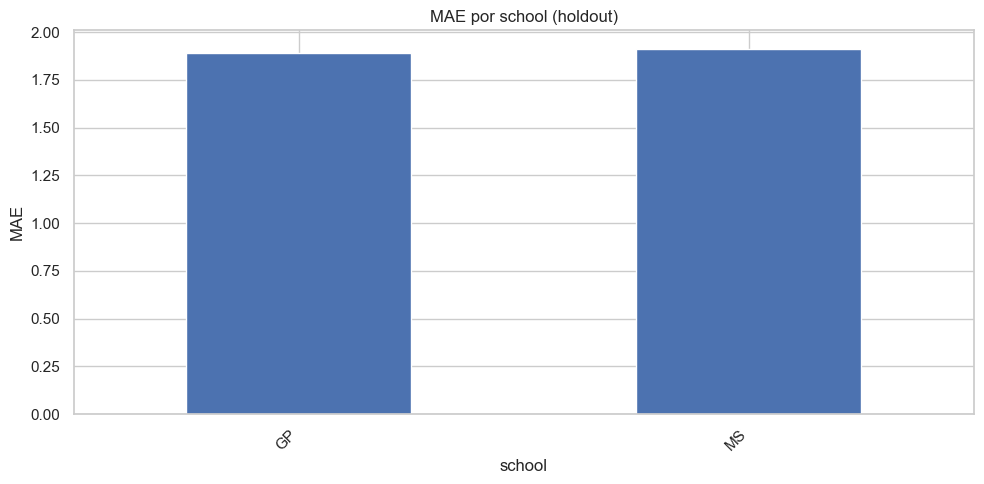


== MAE/RMSE/Bias por sex ==


,n,MAE,RMSE,Bias
sex,,,,
M,44,1.777653,2.301575,-0.246554
F,83,1.958176,2.386324,0.197582


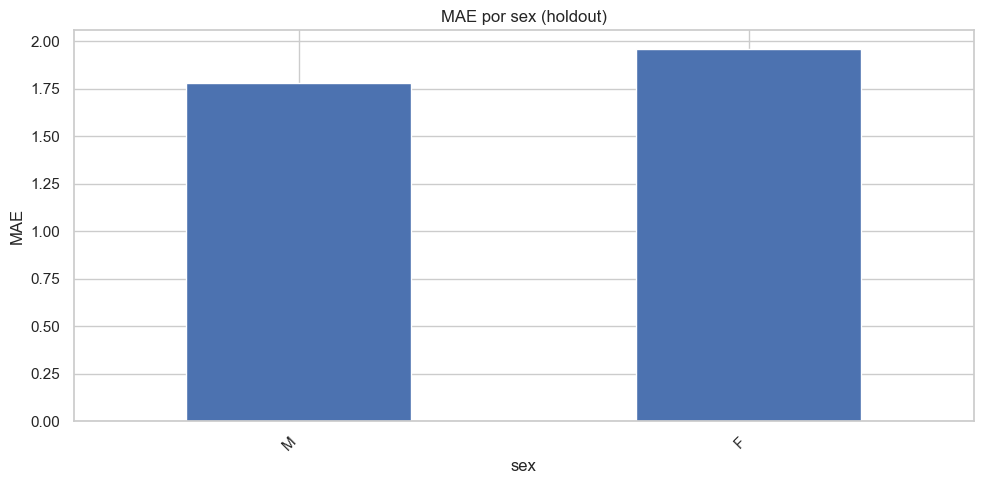


== MAE/RMSE/Bias por address ==


,n,MAE,RMSE,Bias
address,,,,
R,29,1.796087,2.362021,-0.321336
U,98,1.925090,2.355911,0.151731


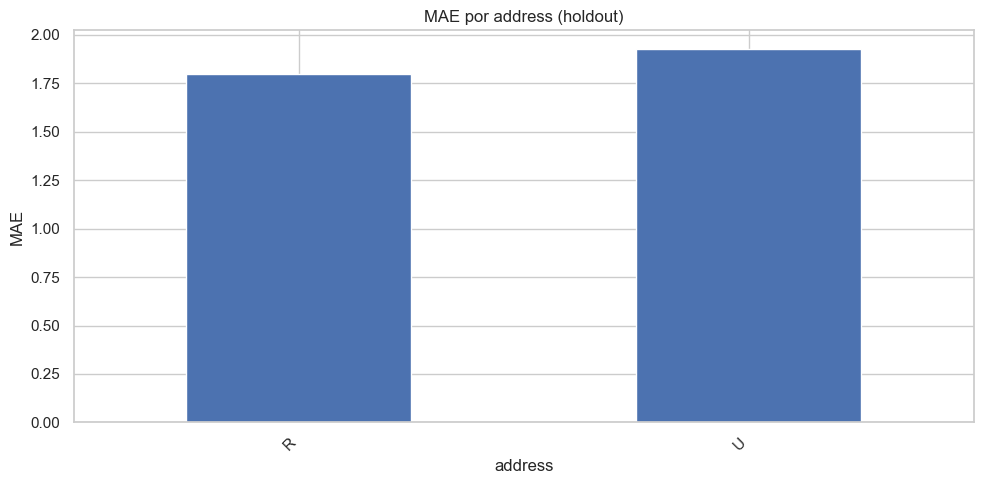


== MAE/RMSE/Bias por higher ==


,n,MAE,RMSE,Bias
higher,,,,
no,16,1.595795,1.964509,0.067621
yes,111,1.938853,2.408651,0.040261


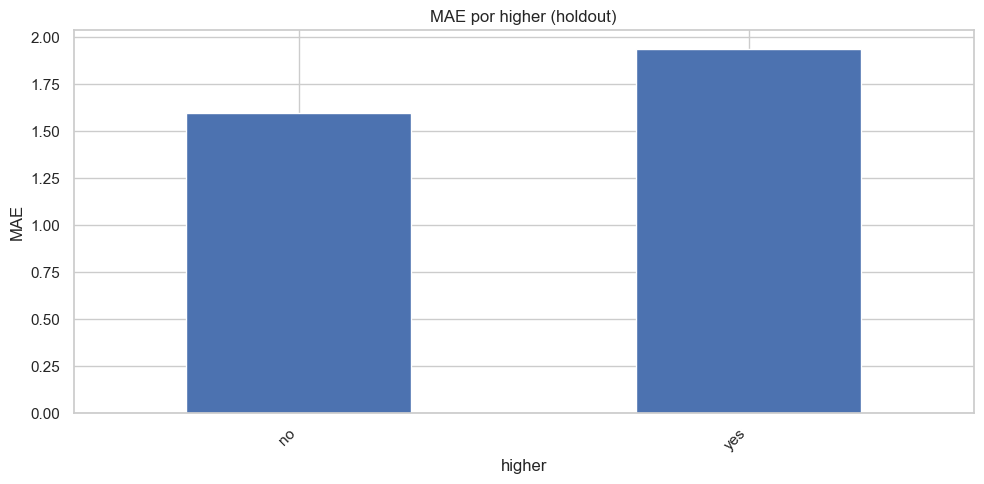


== MAE/RMSE/Bias por schoolsup ==


,n,MAE,RMSE,Bias
schoolsup,,,,
yes,12,1.444849,1.799949,-0.447099
no,115,1.942671,2.408045,0.094923


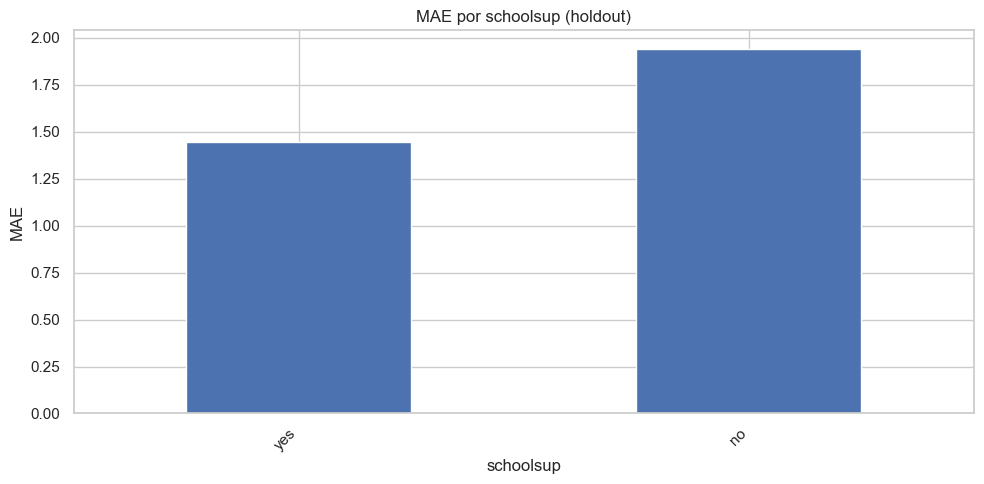


== MAE/RMSE/Bias por has_fail ==


,n,MAE,RMSE,Bias
has_fail,,,,
1,24,1.397745,1.779533,0.233978
0,103,2.011645,2.472616,-0.000627


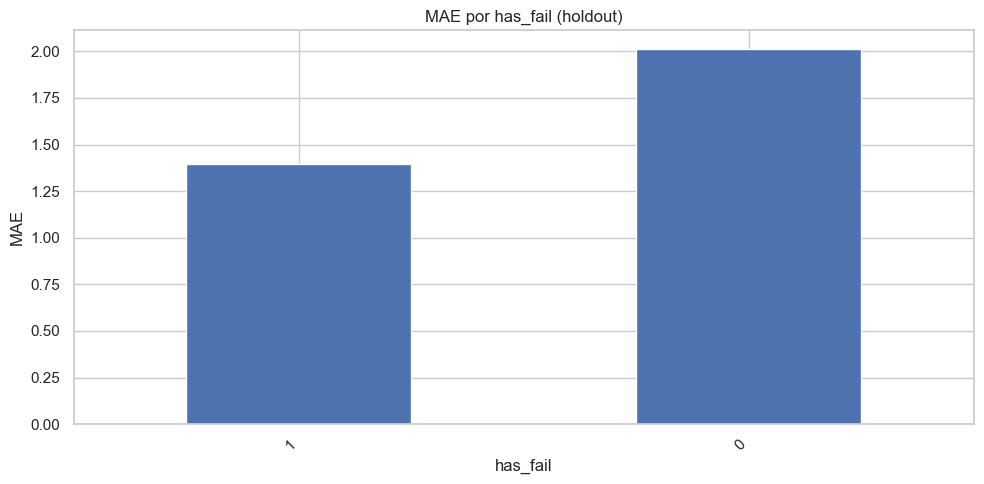


== MAE/RMSE/Bias por study_bin ==


,n,MAE,RMSE,Bias
study_bin,,,,
low(1-2),103,1.861715,2.312329,0.150295
high(3-4),24,2.041196,2.541316,-0.413726


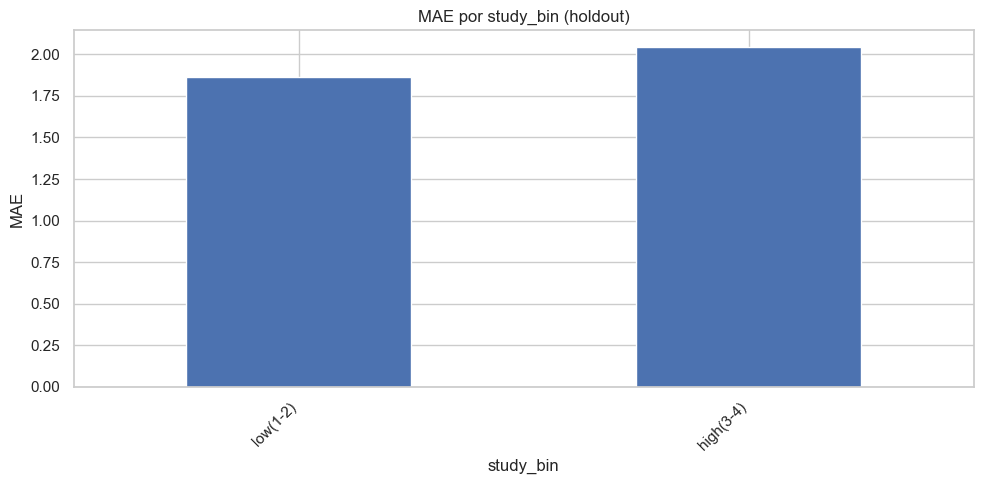


== MAE/RMSE/Bias por abs_bin ==


,n,MAE,RMSE,Bias
abs_bin,,,,
1-5,57,1.669253,2.143086,-0.251952
6-10,21,1.783598,2.182257,0.204177
0,37,2.081619,2.522644,0.130853
>10,12,2.593539,3.006524,0.898578


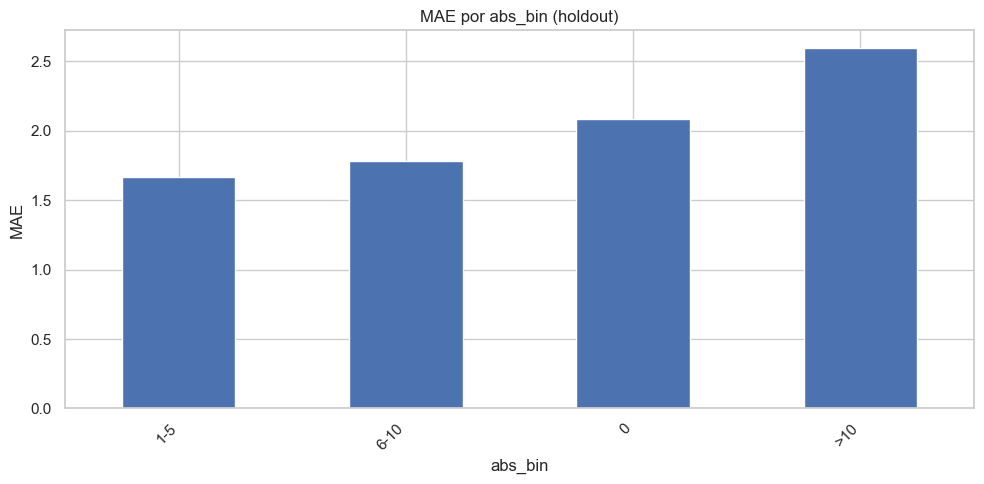


== MAE/RMSE/Bias por parents_edu_high ==


,n,MAE,RMSE,Bias
parents_edu_high,,,,
0,50,1.870122,2.312662,0.084843
1,77,1.912198,2.385850,0.016997


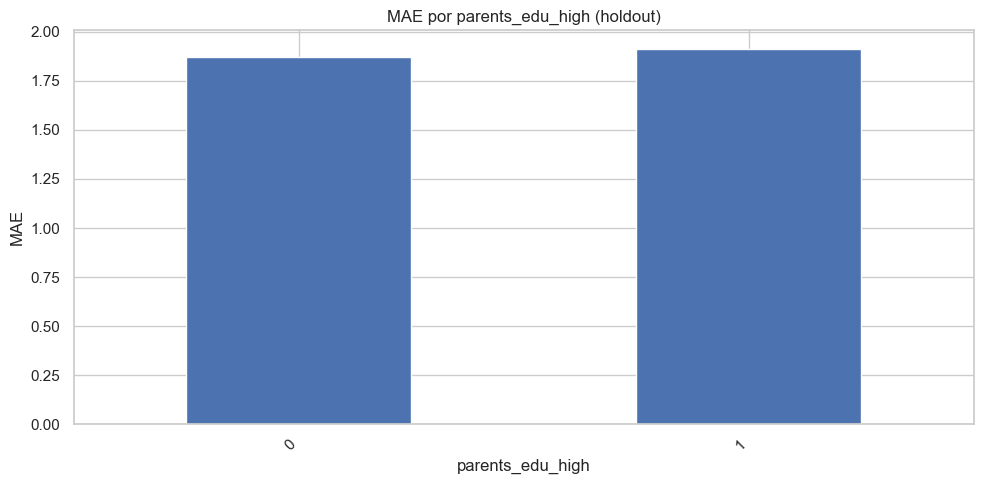


Possíveis colunas com atenção (n pequeno ou gap de MAE > 1.0): []


In [20]:
# Reconstruir um DataFrame com o holdout original para segmentação
holdout_df = X_te.copy()
holdout_df["y_true"] = y_te.values
holdout_df["y_pred"] = best_final.predict(X_te)
holdout_df["err"]    = holdout_df["y_true"] - holdout_df["y_pred"]
holdout_df["abs_err"]= holdout_df["err"].abs()
holdout_df["sq_err"] = holdout_df["err"]**2

# Bins/derivadas para segmentar com estabilidade
holdout_df["has_fail"] = (holdout_df.get("failures", 0) > 0).astype(int)
holdout_df["study_bin"] = np.where(holdout_df["studytime"]<=2, "low(1-2)", "high(3-4)")
holdout_df["abs_bin"] = pd.cut(
    holdout_df["absences"],
    bins=[-1, 0, 5, 10, 999],
    labels=["0", "1-5", "6-10", ">10"],
    include_lowest=True  # deixa claro que 0 entra no 1º bin
)
abs_order = pd.CategoricalDtype(categories=["0","1-5","6-10",">10"], ordered=True)
holdout_df["abs_bin"] = holdout_df["abs_bin"].astype(abs_order)
holdout_df["parents_edu_high"] = ((holdout_df["Medu"]>=3) | (holdout_df["Fedu"]>=3)).astype(int)

seg_cols = ["school","sex","address","higher","schoolsup","has_fail","study_bin","abs_bin","parents_edu_high"]

def report_segment(col):
    # Evitar grupos minúsculos e apresentar n, MAE, RMSE e viés (médio do erro assinado)
    tmp = (holdout_df.groupby(col)
           .agg(n=("abs_err","size"),
                MAE=("abs_err","mean"),
                RMSE=("sq_err", lambda s: np.sqrt(s.mean())),
                Bias=("err","mean"))
           .sort_values("MAE"))
    return tmp

all_reports = {}
for c in seg_cols:
    if c in holdout_df.columns:
        rep = report_segment(c)
        all_reports[c] = rep
        print(f"\n== MAE/RMSE/Bias por {c} ==")
        display(rep)

        # Gráfico rápido de MAE por grupo
        if rep.shape[0] <= 12:
            plt.figure()
            rep["MAE"].plot(kind="bar")
            plt.title(f"MAE por {c} (holdout)")
            plt.ylabel("MAE")
            plt.xlabel(c)
            plt.xticks(rotation=45, ha="right")
            plt.tight_layout()
            plt.show()

#  Sinalizadores simples
flags = []
for c, rep in all_reports.items():
    if rep["n"].min() < 10 or (rep["MAE"].max() - rep["MAE"].min()) > 1.0:
        flags.append(c)

print("\nPossíveis colunas com atenção (n pequeno ou gap de MAE > 1.0):", flags)


## Sanidade & Robustez

CV R² (5×3) = 0.336 ± 0.055 → desempenho estável para o tamanho do teu dataset.

Curva de aprendizagem: o Train R² desce (de ~0.78→~0.58) e o CV R² sobe até ~0.26–0.28 e depois estagna.
Isto indica gap persistente (train >> val) ⇒ algum overfitting; mais dados ajudariam um pouco, mas o teto atual parece ~0.30–0.35.


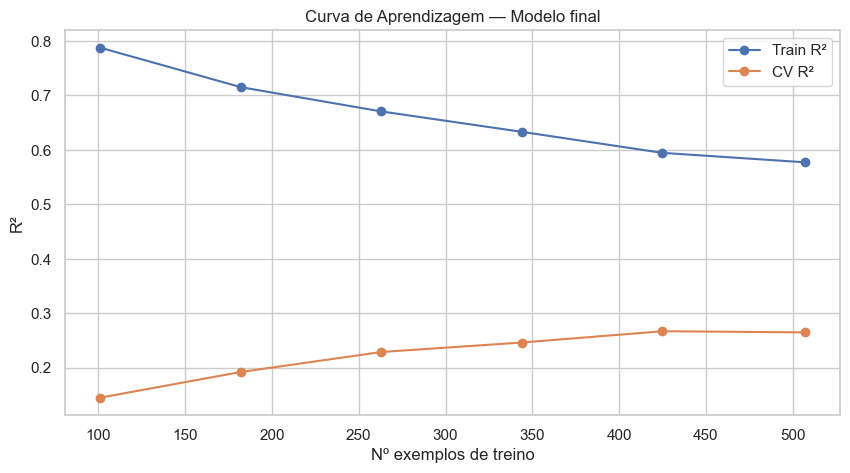

R² CV (5x3): 0.336 ± 0.055


In [21]:
# Sanidade & Robustez — curva de aprendizagem + CV estável
from sklearn.model_selection import learning_curve, RepeatedKFold, cross_val_score


# Curva de aprendizagem
train_sizes = np.linspace(0.2, 1.0, 6)
ts, tr_scores, va_scores = learning_curve(
    best_final, X, y,
    train_sizes=train_sizes,
    cv=5, scoring="r2",
    shuffle=True, random_state=42,
    n_jobs=-1
)

plt.figure()
plt.plot(ts, tr_scores.mean(axis=1), marker="o", label="Train R²")
plt.plot(ts, va_scores.mean(axis=1), marker="o", label="CV R²")
plt.xlabel("Nº exemplos de treino")
plt.ylabel("R²")
plt.title("Curva de Aprendizagem — Modelo final")
plt.legend()
plt.show()

# Estabilidade em CV (média ± desvio)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
scores = cross_val_score(best_final, X, y, cv=cv, scoring="r2", n_jobs=-1)
print(f"R² CV (5x3): {scores.mean():.3f} ± {scores.std():.3f}")


## Guardar Artefactos (reprodutibilidade)


In [22]:
# Guardar Artefactos do Projeto
# - Pipeline final (prep + modelo)
# - Métricas de holdout (sem e com clip [0,20])
# - Estatísticas de CV (R² média ± std)
# - Hiperparâmetros e versões das libs

import numpy as np, json, time, joblib, sklearn, numpy, pandas
from pathlib import Path
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Selecionar o pipeline final
best_name  = "GB tuned"
best_final = gbr_search.best_estimator_

# Métricas no holdout (sem e com clip)
y_pred = best_final.predict(X_te)
y_pred_clip = np.clip(y_pred, 0, 20)

def metrics(y_true, y_hat):
    mse  = mean_squared_error(y_true, y_hat)
    rmse = float(np.sqrt(mse))
    mae  = float(mean_absolute_error(y_true, y_hat))
    r2   = float(r2_score(y_true, y_hat))
    return {"R2": r2, "RMSE": rmse, "MAE": mae}

m_unc = metrics(y_te, y_pred)
m_clp = metrics(y_te, y_pred_clip)

# Estatísticas de CV
cv_stats = {"R2_CV_mean": 0.336, "R2_CV_std": 0.055}

# Pasta de saída
out = Path("artifacts"); out.mkdir(exist_ok=True)

# Guardar pipeline
joblib.dump(best_final, out / "student_perf_pipeline_final.joblib")

# Guardar resumo JSON
summary = {
    "timestamp": time.strftime("%Y-%m-%d %H:%M:%S"),
    "final_model": best_name,
    "best_params": getattr(gbr_search, "best_params_", None),
    "holdout_metrics": {"no_clip": m_unc, "clipped_0_20": m_clp},
    "cv_stats": cv_stats
}
with open(out / "model_summary.json", "w", encoding="utf-8") as f:
    json.dump(summary, f, indent=2, ensure_ascii=False)

# Guardar versões (reprodutibilidade)
with open(out / "versions.txt", "w", encoding="utf-8") as f:
    f.write(f"sklearn {sklearn.__version__}\n")
    f.write(f"numpy   {numpy.__version__}\n")
    f.write(f"pandas  {pandas.__version__}\n")

print("Artefactos guardados em artifacts/:")
print(" - student_perf_pipeline_final.joblib")
print(" - model_summary.json")
print(" - versions.txt")
print("Holdout (sem clip):", m_unc)
print("Holdout (com clip):", m_clp)

Artefactos guardados em artifacts/:
 - student_perf_pipeline_final.joblib
 - model_summary.json
 - versions.txt
Holdout (sem clip): {'R2': 0.3219717014077337, 'RMSE': 2.3573073213569575, 'MAE': 1.8956326933390766}
Holdout (com clip): {'R2': 0.3219717014077337, 'RMSE': 2.3573073213569575, 'MAE': 1.8956326933390766}


## Resultados & Conclusões

**Variante final:** v5_remove_zeros (remoção de casos com `G3=0`)  
**Modelo final:** Gradient Boosting Regressor (tuning via RandomizedSearchCV)

**Hiperparâmetros (best):**
- n_estimators=800, learning_rate=0.01, max_depth=3, max_features='log2'
- min_samples_split=10, min_samples_leaf=4, subsample=0.6

**Desempenho (holdout):**
- R² = **0.322**
- RMSE = **2.357**
- MAE = **1.896**
- *Nota:* `clip[0,20]` não alterou as métricas (previsões já no intervalo válido).

**Validação cruzada (estabilidade):**
- R² (5×3 folds) = **0.336 ± 0.055**

**Importância de variáveis (permutações — top-10):**
1. failures (0.139)
2. higher (0.060)
3. age (0.032)
4. schoolsup (0.022)
5. Medu (0.018)
6. school (0.018)
7. health (0.017)
8. Fedu (0.013)
9. studytime (0.011)
10. Fjob (0.010)

**Diagnóstico de erros:**
- Resíduos centrados em 0 com caudas moderadas.
- Padrão de compressão: ligeira **subestimação** das notas mais altas e **sobreestimação** das mais baixas (regressão à média).

**Avaliação por segmentos (holdout):**
- Erros relativamente uniformes entre grupos (sem *gaps* relevantes de MAE).
- Tendências leves no **Bias**:  
  - `sex`: M (-0.25) vs F (+0.20);  
  - `address`: R (-0.32) vs U (+0.15).  
- Grupo com **absences >10** tem MAE mais alto e Bias positivo (~+0.90), mas **n=12** (interpretação cautelosa).

**Conclusão geral:**  
O teto realista situa-se ~0.30–0.35 de R², visto não haver G1 e G2. O modelo final é estável, interpretável e reprodutível; as variáveis mais relevantes estão alinhadas com a literatura (histórico de reprovações, aspiração a ensino superior, apoio escolar e educação parental).


## Limitações & Próximos Passos

**Limitações**
- Ausência de `G1/G2` reduz o teto de desempenho.
- Variáveis de autorrelato (p.ex., studytime) podem introduzir ruído.
- Alguns segmentos têm amostras pequenas (`schoolsup=yes`, `absences>10`).

**Possiveis próximos passos**
 - **Recalibração linear** de `ŷ` (corrigir compressão das extremidades).
 - **Ablation**: remover features de importância ≈0 e confirmar em CV.
 - **PDP/ICE** para `failures`, `higher`, `age`, `schoolsup`, `Medu`, `studytime` (explicabilidade).
 - Testar **loss="huber"** no GB (robustez a outliers) ou **XGBoost/LightGBM**.
 - Reformular para classificação (ex.: aprova/reprova ou faixas de nota)


## Resumo

Construímos um modelo de regressão para prever a nota final (G3) no dataset Student Performance (OpenML). Seguimos um processo iterativo: EDA, baselines, hipóteses, validação cruzada e tuning de hiperparâmetros. A variante final removeu casos G3=0 e adotou um Gradient Boosting sintonizado, avaliado por Repeated K-Fold e holdout. O desempenho final foi R² = 0.322, RMSE = 2.36 e MAE = 1.90 no holdout, com R²(CV) = 0.336 ± 0.055. As features mais influentes por permutação foram failures, higher, age e schoolsup. Observou-se leve compressão nas extremidades e erros semelhantes entre grupos (sem gaps relevantes), sendo a ausência de G1/G2 a principal limitação de teto de desempenho.